## 01. 유방암 데이터 셋 분석하기

## 1-1 데이터 셋 불러오기 및 탐색

In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 형태 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
유방암 데이터의 형태 : (569, 30)


#### scikit-learn의 데이터 셋
<pre>
- scikit-learn에 포함된 데이터 셋은 실제 데이터와 관련정보 담고 있는 Bunch객체에 저장되어 있다.
- Bunch 객체는 '.' 표기법의 사용이 가능하다.
</pre>

## 1-2 데이터 셋 나누기

In [61]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=77)

### 작업 단계
<pre>
(1) 모델 만들기
(2) 모델 fitting(훈련)
(3) 훈련 데이터를 이용한 정확도
(4) 테스트 데이터를 이용한 정확도
</pre>

In [62]:
# k의 수를 1~11까지 변경해 가며 확인.
  # (1) 모델 만들기
  # (2) 모델 fitting(훈련)
  # (3) 훈련 데이터를 이용한 정확도
  # (4) 테스트 데이터를 이용한 정확도 

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    
    score_tr = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)
    training_accuracy.append(score_tr)
    test_accuracy.append(score_test)
    
    print("k : {}".format(n))
    print("accuracy of training set : {:.2f}".format(score_tr))
    print("accuracy of test set : {:.2f}".format(score_test))

k : 1
accuracy of training set : 1.00
accuracy of test set : 0.89
k : 2
accuracy of training set : 0.97
accuracy of test set : 0.90
k : 3
accuracy of training set : 0.96
accuracy of test set : 0.91
k : 4
accuracy of training set : 0.95
accuracy of test set : 0.90
k : 5
accuracy of training set : 0.95
accuracy of test set : 0.92
k : 6
accuracy of training set : 0.96
accuracy of test set : 0.90
k : 7
accuracy of training set : 0.95
accuracy of test set : 0.91
k : 8
accuracy of training set : 0.95
accuracy of test set : 0.91
k : 9
accuracy of training set : 0.95
accuracy of test set : 0.91
k : 10
accuracy of training set : 0.94
accuracy of test set : 0.91


In [63]:
print("훈련용 데이터 정확도 : {}\n".format( training_accuracy ))
print("테스트 데이터 정확도 : {}\n".format( test_accuracy ))

훈련용 데이터 정확도 : [1.0, 0.9741784037558685, 0.95539906103286387, 0.95305164319248825, 0.95305164319248825, 0.95539906103286387, 0.95305164319248825, 0.94835680751173712, 0.9460093896713615, 0.94366197183098588]

테스트 데이터 정확도 : [0.88811188811188813, 0.90209790209790208, 0.90909090909090906, 0.90209790209790208, 0.91608391608391604, 0.90209790209790208, 0.90909090909090906, 0.90909090909090906, 0.90909090909090906, 0.90909090909090906]



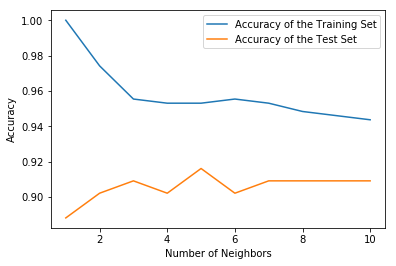

In [64]:
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the Training Set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

## 1-3 여러모델 적용 후, 평가

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [66]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [67]:
# shape
print(dataset.shape)
# head
print(dataset.head(10))

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [68]:
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


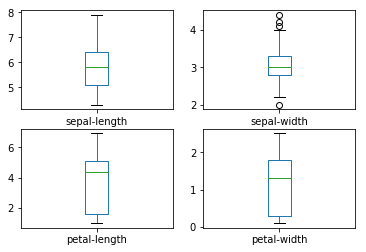

In [69]:
# box and whisker plots
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 참조
dataset.plot(kind='box',      # plot의 종류   line. bar, hist, box, pie, scatter etc..
             subplots=True,   # 컬럼을 나눌 것인지
             layout=(2,2),    # (rows, columns)  subplots의 배치
             sharex=False,    #  x축을 공유할 것인지 아닌지
             sharey=False)    # 전체 plot에 y축을 공유할 것인지 아닌지
plt.show()

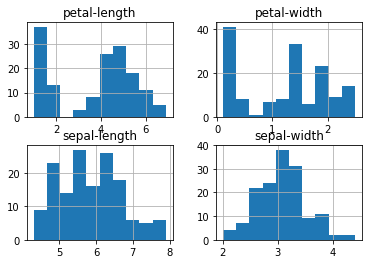

In [70]:
# histograms
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html 참조
dataset.hist()
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


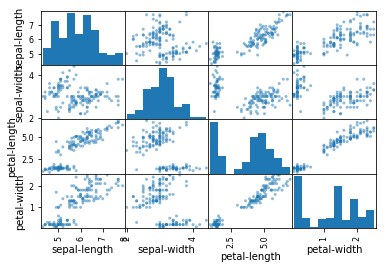

In [71]:
# from pandas.tools.plotting import scatter_matrix

# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [72]:
array = dataset.values
X = array[:,0:4]             # 1,2,3,4 열 선택
Y = array[:,4]               # 5열(Species) 선택
validation_size = 0.20      # 평가용 데이터 셋 비율
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, 
                                                       test_size=validation_size, random_state=seed)

In [73]:
# Spot Check Algorithms
models = []
models.append(('LogisticReg', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE_CART', DecisionTreeClassifier()))
models.append(('NaiveBayes', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []   # 결과
names = []     # 모델 이름
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) # 교차검증
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LogisticReg: 0.966667 (0.040825)
KNN: 0.983333 (0.033333)
TREE_CART: 0.975000 (0.038188)
NaiveBayes: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


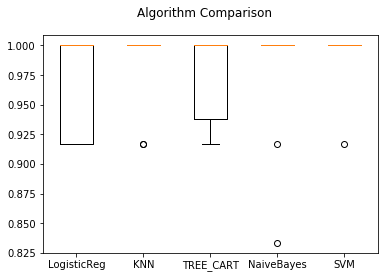

In [74]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [75]:
# 평가용 데이터로 모델 평가 수행.(KNN으로 한다.)
# support 는 응답의 샘플수를 이야기한다.

print(X_test.shape)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)                  # 예측 수행
print(accuracy_score(y_test, pred))         # 정확도
print(confusion_matrix(y_test, pred))       # confusion matrix
print(classification_report(y_test, pred))  # 평가지표 정리

(30, 4)
0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



### REF
<pre>
https://pandas.pydata.org/pandas-docs/stable/visualization.html  - pandas 시각화 참조
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html - pandas.plot 참조 
</pre>